In [1]:
import pandas as pd
import numpy as np
import os

from sklearn.metrics import mean_squared_error
from math import sqrt

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
target_col = '18~20_ride'

## oof

In [19]:
lgbm_oof = pd.read_csv('../oof/lgbm_40_seeds_stractified5k_bus_route_id.csv')
lgbm_port_oof = pd.read_csv('../oof/lgbm_5_seeds_stractified5k_bus_route_id_port.csv')
cat_oof    = pd.read_csv('../oof/cat_5_seeds_stractified5k_bus_route_id.csv')
cat_port_oof = pd.read_csv('../oof/cat_1_seeds_stractified5k_bus_route_id_port.csv')

train_label = pd.read_csv('../raw_dataset/train.csv', usecols = ['18~20_ride'])

In [20]:
df = pd.DataFrame(data = {'lgbm': lgbm_oof[target_col],
                                           'lgbm_port': lgbm_port_oof[target_col],
                                     'cat' : cat_oof[target_col],
                                     'cat_port':cat_port_oof[target_col]})

In [27]:
print( sqrt(mean_squared_error( train_label, lgbm_oof[target_col] )) )
print( sqrt(mean_squared_error( train_label, lgbm_port_oof[target_col] )) )
print( sqrt(mean_squared_error( train_label, cat_oof[target_col] )) )
print( sqrt(mean_squared_error( train_label, cat_port_oof[target_col] )) )

print('='*80)
# print( sqrt(mean_squared_error( train_label, (  0.4* lgbm_oof[target_col] + 0.6*cat_oof[target_col] ) )) )
print( sqrt(mean_squared_error( train_label, (  0.25* lgbm_oof[target_col]+ 0.25 * lgbm_port_oof[target_col] + 0.5*cat_oof[target_col] ) )) )
print( sqrt(mean_squared_error( train_label, (  0.25* lgbm_oof[target_col]+ 0.25 * lgbm_port_oof[target_col] + 0.45*cat_oof[target_col] +0.05*cat_port_oof[target_col] ) )) )

# print( sqrt(mean_squared_error( train_label, (  0.6* lgbm_oof[target_col] + 0.4*cat_oof[target_col] ) )) )

2.1373067443650533
2.1388712283613938
2.132076609656555
2.1715260943620196
2.1101233989772923
2.1099043730490754


In [9]:
print( sqrt(mean_squared_error( train_label, lgbm_oof[target_col] )) )
print( sqrt(mean_squared_error( train_label, lgbm_port_oof[target_col] )) )
print( sqrt(mean_squared_error( train_label, cat_oof[target_col] )) )
print('='*80)
# print( sqrt(mean_squared_error( train_label, (  0.4* lgbm_oof[target_col] + 0.6*cat_oof[target_col] ) )) )
print( sqrt(mean_squared_error( train_label, (  0.25* lgbm_oof[target_col]+ 0.25 * lgbm_port_oof[target_col] + 0.5*cat_oof[target_col] ) )) )
# print( sqrt(mean_squared_error( train_label, (  0.6* lgbm_oof[target_col] + 0.4*cat_oof[target_col] ) )) )

2.1373067443650533
2.1388712283613938
2.132076609656555
2.1101233989772923


In [7]:
final_oof = 0.5* lgbm_oof[target_col] + 0.5*cat_oof[target_col] 

## sub

In [10]:
lgbm_sub = pd.read_csv('../submission/lgbm_40_seeds_stractified5k_bus_route_id.csv')
lgbm_port_sub = pd.read_csv('../submission/lgbm_5_seeds_stractified5k_bus_route_id_port.csv')
cat_sub    = pd.read_csv('../submission/cat_5_seeds_stractified5k_bus_route_id.csv')

train_label = pd.read_csv('../raw_dataset/train.csv', usecols = ['18~20_ride'])

In [11]:
final_predict = 0.25* lgbm_sub[target_col] + 0.25*lgbm_port_sub[target_col] + 0.5*cat_sub[target_col] 

In [12]:
df_sub = pd.read_csv( '../raw_dataset/submission_sample.csv')
df_sub['18~20_ride'] = final_predict
df_sub.to_csv('../ensemble/cat5seeds_lgbm40seeds_lgbmport5seeds_ensemble.csv',index=False)


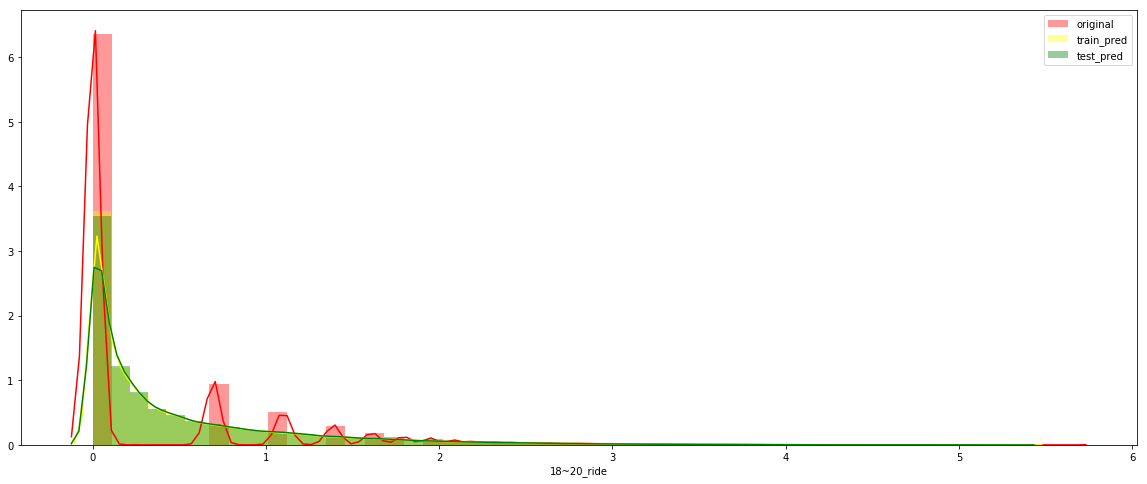

In [13]:
plt.figure(figsize=(20,8))
sns.distplot( np.log1p(train_label ), color='red' , label='original')
sns.distplot( np.log1p( final_oof ) , color='yellow', label='train_pred')
sns.distplot( np.log1p( final_predict ) , color='green', label='test_pred')
plt.legend()
